# Telecom Churn Prediction using Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"E:\MLIoT\ML\dataset\telecom\telecom_churn_modelling.xlsx")
df.shape

(3333, 20)

<img src ="DSlifecycle.png">

## 2. Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [4]:
df['International plan'].unique()

array(['No', 'Yes'], dtype=object)

In [5]:
df['Voice mail plan'].unique()

array(['Yes', 'No'], dtype=object)

In [6]:
df.head(20)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [7]:
df.describe(include='all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


## 3. Data Cleaning

In [8]:
#check for missing values
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [9]:
# check for duplicated rows
df.duplicated().sum()

0

In [10]:
# check for outliers
df.skew()

Account length            0.096606
Area code                 1.126823
Number vmail messages     1.264824
Total day minutes        -0.029077
Total day calls          -0.111787
Total day charge         -0.029083
Total eve minutes        -0.023877
Total eve calls          -0.055563
Total eve charge         -0.023858
Total night minutes       0.008921
Total night calls         0.032500
Total night charge        0.008886
Total intl minutes       -0.245136
Total intl calls          1.321478
Total intl charge        -0.245287
Customer service calls    1.091359
Churn                     2.018356
dtype: float64

In [11]:
# Number vmail messages - we can take action while performing feature extraction
# Total intl class - we will take action during correlation analysis
# Customer service calls - the skew is almost 1, thus we can go ahead without an action

## 4.Feature Engineering
#### Feature Extraction

In [12]:
df['Number vmail messages'].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: Number vmail messages, dtype: float64

In [13]:
df['Number vmail messages'][df['Number vmail messages']>0].describe()

count    922.000000
mean      29.277657
std        7.559027
min        4.000000
25%       24.000000
50%       29.000000
75%       34.000000
max       51.000000
Name: Number vmail messages, dtype: float64

In [14]:
# New categorical feature = 
                # if numofvmailmessage <1 = No VM plan
                # if numofvmailmessage >1 and <29 = Normal users
                # if numofvmailmessage >29 and <200= High Frequency users

In [15]:
df['vmail_messages'] = pd.cut(df['Number vmail messages'],bins=[0,1,30,200],
                             labels=['No VM plan','Normal Users','High Frequency users'],
                             include_lowest=True)
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,vmail_messages
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,Normal Users
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,Normal Users
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,No VM plan
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,No VM plan
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,No VM plan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,...,18.32,279.1,83,12.56,9.9,6,2.67,2,False,High Frequency users
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,...,13.04,191.3,123,8.61,9.6,4,2.59,3,False,No VM plan
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,...,24.55,191.9,91,8.64,14.1,6,3.81,2,False,No VM plan
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,...,13.57,139.2,137,6.26,5.0,10,1.35,2,False,No VM plan


#### Feature Selection

###### Correlation Analysis

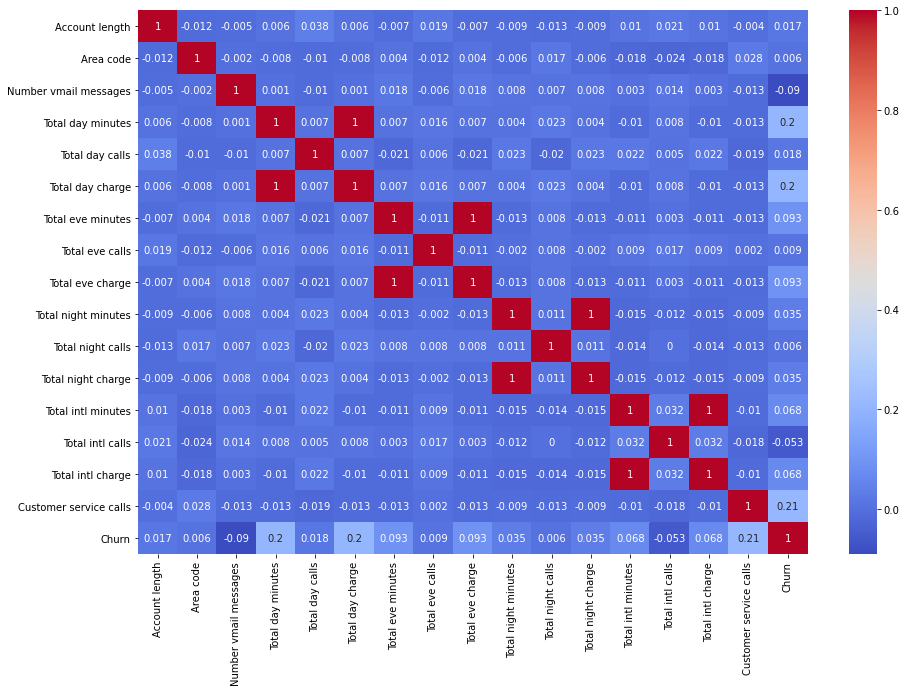

In [16]:
cor = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor.round(3),annot=True,cmap='coolwarm')
plt.show()

In [17]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'vmail_messages'],
      dtype='object')

######  ANOVA is used for comparing the distribution of a numeric variable in two or more groups
- Ho = Null Hypothesis = the distribution of the varible in multiple groups is uniform
- Ha = Alternate Hypothesis = the distribution of the variable in multiple groups in different

we analyse the pvalue, lets say for confidence interval of 95%, significance level = 5%
- if pvalue>0.05 = accept the null hypothesis and the feature is NOT important
- if pvalue <0.05 = reject the null hypothesis and the feature is important

In [18]:
numerics = ['Account length','Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls']
xnum = df[numerics]
y = df['Churn']
from sklearn.feature_selection import f_classif
fval,pval = f_classif(xnum,y)
for i in range(len(numerics)):print(numerics[i],pval[i])

Account length 0.33976000705720666
Number vmail messages 2.1175218402696038e-07
Total day minutes 5.300278227509361e-33
Total day calls 0.28670102402211844
Total day charge 5.30060595239102e-33
Total eve minutes 8.011338561256927e-08
Total eve calls 0.5941305829720491
Total eve charge 8.036524227754477e-08
Total night minutes 0.04046648463758881
Total night calls 0.7230277872081609
Total night charge 0.040451218769160205
Total intl minutes 8.05731126549437e-05
Total intl calls 0.002274701409850077
Total intl charge 8.018753583047257e-05
Customer service calls 3.900360240185746e-34


###### Chi Square test

In [19]:
categories = ['State','Area code', 'International plan',
       'Voice mail plan','vmail_messages']

y = df['Churn']
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
for col in categories:
    xcat = LabelEncoder().fit_transform(df[col]).reshape(-1,1)
    cval,pval = chi2(xcat,y)
    print(col,pval)

State [0.19214979]
Area code [0.89394206]
International plan [4.09173473e-46]
Voice mail plan [5.28486023e-07]
vmail_messages [0.32750538]


In [20]:
x = df[['International plan','vmail_messages','Total day minutes','Total eve minutes',
     'Total night minutes','Total intl minutes','Customer service calls']]
y = df['Churn']

## 5. Preprocessing

In [21]:
x.head()

,International plan,vmail_messages,Total day minutes,Total eve minutes,Total night minutes,Total intl minutes,Customer service calls
0,No,Normal Users,265.1,197.4,244.7,10.0,1
1,No,Normal Users,161.6,195.5,254.4,13.7,1
2,No,No VM plan,243.4,121.2,162.6,12.2,0
3,Yes,No VM plan,299.4,61.9,196.9,6.6,2
4,Yes,No VM plan,166.7,148.3,186.9,10.1,3


In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
preprocessor = ColumnTransformer([('ohe',OneHotEncoder(),[1]),
                                ('ode',OrdinalEncoder(),[0]),
                                 ('sc',StandardScaler(),[2,3,4,5,6])])

In [23]:
x_new = preprocessor.fit_transform(x)
pd.DataFrame(x_new).head()

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,1.0,0.0,1.566767,-0.070610,0.866743,-0.085008,-0.427932
1,0.0,0.0,1.0,0.0,-0.333738,-0.108080,1.058571,1.240482,-0.427932
2,0.0,1.0,0.0,0.0,1.168304,-1.573383,-0.756869,0.703121,-1.188218
3,0.0,1.0,0.0,1.0,2.196596,-2.742865,-0.078551,-1.303026,0.332354
4,0.0,1.0,0.0,1.0,-0.240090,-1.038932,-0.276311,-0.049184,1.092641


In [24]:
# train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_new,y,test_size=0.2,random_state=5)
print(x.shape)
print(xtrain.shape)
print(xtest.shape)
print(y.shape)
print(ytrain.shape)
print(ytest.shape)

(3333, 7)
(2666, 9)
(667, 9)
(3333,)
(2666,)
(667,)


## 6. Apply Machine Learning algorithm - Logistic regression


In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(xtrain,ytrain)

LogisticRegression(class_weight='balanced')

In [26]:
import joblib
joblib.dump(model,"model.pkl")
joblib.dump(preprocessor,'preprocessor.pkl')

['preprocessor.pkl']

## 7. performance analysis

In [26]:
from sklearn import metrics
ypred = model.predict(xtest)
metrics.accuracy_score(ytest,ypred)

0.7796101949025487

In [27]:
# recall
metrics.recall_score(ytest,ypred)

0.8043478260869565

In [28]:
metrics.precision_score(ytest,ypred)

0.3645320197044335

In [29]:
metrics.f1_score(ytest,ypred)

0.5016949152542373

In [30]:
metrics.confusion_matrix(ytest,ypred)

array([[446, 129],
       [ 18,  74]], dtype=int64)

- for each customer i loose and could not be identified as leaving- USD 5
- for each customer wrongly providing offer (to those who do not need the offer) = USD 2


In [31]:
loss = 75*5 + 9*2
loss

393

## 8. Optimization and Tuning

1. At the data level 
    - Extract more features
    - collect more data - features / samples
    - perform better preprocessing
    - improve feature selection process - drop irrelevant features
    
    
2. At the modelling level
    - Tune the hyperparameters of the algorithm to improve its performance
    - Change the ML algorithm used for modelling
    - combine multiple algorithms to make predictions

# -------------------------------------------------------
#                       Decision Tree
# -------------------------------------------------------

In [32]:
x.head()

,International plan,vmail_messages,Total day minutes,Total eve minutes,Total night minutes,Total intl minutes,Customer service calls
0,No,Normal Users,265.1,197.4,244.7,10.0,1
1,No,Normal Users,161.6,195.5,254.4,13.7,1
2,No,No VM plan,243.4,121.2,162.6,12.2,0
3,Yes,No VM plan,299.4,61.9,196.9,6.6,2
4,Yes,No VM plan,166.7,148.3,186.9,10.1,3


In [33]:
# preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
preprocessor = ColumnTransformer([('ohe',OneHotEncoder(),[1]),
                                ('ode',OrdinalEncoder(),[0])],
                                remainder="passthrough")
x_new = preprocessor.fit_transform(x)
pd.DataFrame(x_new)

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,1.0,0.0,265.1,197.4,244.7,10.0,1.0
1,0.0,0.0,1.0,0.0,161.6,195.5,254.4,13.7,1.0
2,0.0,1.0,0.0,0.0,243.4,121.2,162.6,12.2,0.0
3,0.0,1.0,0.0,1.0,299.4,61.9,196.9,6.6,2.0
4,0.0,1.0,0.0,1.0,166.7,148.3,186.9,10.1,3.0
...,...,...,...,...,...,...,...,...,...
3328,1.0,0.0,0.0,0.0,156.2,215.5,279.1,9.9,2.0
3329,0.0,1.0,0.0,0.0,231.1,153.4,191.3,9.6,3.0
3330,0.0,1.0,0.0,0.0,180.8,288.8,191.9,14.1,2.0
3331,0.0,1.0,0.0,1.0,213.8,159.6,139.2,5.0,2.0


In [34]:


# train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_new,y,test_size=0.2,random_state=5)
print(x.shape)
print(xtrain.shape)
print(xtest.shape)
print(y.shape)
print(ytrain.shape)
print(ytest.shape)

(3333, 7)
(2666, 9)
(667, 9)
(3333,)
(2666,)
(667,)


In [35]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=5,class_weight={0:0.5,1:0.5})
model2.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, random_state=5)

In [36]:
# performance analysis
ypred2 = model2.predict(xtest)
print("Accuracy : ",metrics.accuracy_score(ytest,ypred2))
print("Recall : ",metrics.recall_score(ytest,ypred2))
print("F1 score : ",metrics.f1_score(ytest,ypred2))
print("Precision : ",metrics.precision_score(ytest,ypred2))

Accuracy :  0.9100449775112444
Recall :  0.7717391304347826
F1 score :  0.7029702970297029
Precision :  0.6454545454545455


In [37]:
x.columns

Index(['International plan', 'vmail_messages', 'Total day minutes',
       'Total eve minutes', 'Total night minutes', 'Total intl minutes',
       'Customer service calls'],
      dtype='object')

In [38]:
import os
os.environ['PATH']+=os.pathsep+r'C:\Program Files (x86)\Graphviz2.38\bin'

In [39]:
# conda install graphviz
import graphviz
from sklearn import tree

fname = ['International plan', 'vmail_NO_Plan','vmail_Normal','vmail_HF', 'Total day minutes',
       'Total eve minutes', 'Total night minutes', 'Total intl minutes',
       'Customer service calls']
cname = ['Not Leaving','Leaving']
graphdata = tree.export_graphviz(model2,feature_names=fname,class_names=cname,
                                filled=True,rounded=True)
graph = graphviz.Source(graphdata)
graph

KeyboardInterrupt: 

### Overfitting

- the performance of the model stays high on the train data, the performance goes low in testdata,


In [ ]:
# performance analysis On test data
ypred2 = model2.predict(xtest)
print("Accuracy : ",metrics.accuracy_score(ytest,ypred2))
print("Recall : ",metrics.recall_score(ytest,ypred2))
print("F1 score : ",metrics.f1_score(ytest,ypred2))
print("Precision : ",metrics.precision_score(ytest,ypred2))

In [ ]:
# performance analysis on train data
ypred2 = model2.predict(xtrain)
print("Accuracy : ",metrics.accuracy_score(ytrain,ypred2))
print("Recall : ",metrics.recall_score(ytrain,ypred2))
print("F1 score : ",metrics.f1_score(ytrain,ypred2))
print("Precision : ",metrics.precision_score(ytrain,ypred2))

In [ ]:
import joblib
joblib.dump(model2,"../batch2/testing/model.pkl")

joblib.dump(preprocessor,"../batch2/testing/pipeline.pkl")